In [7]:
import os
import csv
import shutil
import pandas as pd

# Path to the patient diagnosis CSV file
csv_file = r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\patient_diagnosis.csv"

# Path to the folder containing audio files
audio_folder = r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files"

# Create disease folders if they don't exist
disease_folder = [r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases\COPD",
                   r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases\Bronchiolitis",
                   r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases\Pneumonia", 
                   r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases\URTI",
                   r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases\Healthy"]
for folder in disease_folder:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Read patient diagnosis from CSV file
diagnosis_df = pd.read_csv(csv_file, names=['patient_id', 'disease'])
    # Iterate through audio files and move them to respective disease folders
data = diagnosis_df


In [3]:
import os
import shutil
import wave
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import librosa.display
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv1D, Conv2D, SeparableConv1D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import Input, add, Flatten, Dense, BatchNormalization, Dropout, LSTM, GRU
from tensorflow.keras.layers import GlobalMaxPooling1D, GlobalMaxPooling2D, Activation, LeakyReLU, ReLU
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import cohen_kappa_score,roc_auc_score,confusion_matrix,classification_report

In [10]:
print(os.getcwd())

C:\Users\abujo


In [22]:
for audio_file in os.listdir(audio_folder):
    if audio_file.endswith(".wav"):  # Assuming the audio files have a .txt extension
       p = list(data[data['patient_id']==int(audio_file[:3])]['disease'])[0]
       print(disease_folder[0])
       print(p)
       audio_file=os.path.join(audio_folder,audio_file)
       print(audio_file)
       if(p=='COPD'):
            shutil.copy(audio_file , disease_folder[0])
            # print(f"Moved \{audio_file} to \{disease} folder.") 
       elif(p=='Bronchiolitis' or p=='Bronchiectasis'):
            shutil.copy( audio_file , disease_folder[1])
            # print(f"Moved \{audio_file} to \{disease} folder.") 
       elif(p=='Pneumonia'):
            shutil.copy(audio_file , disease_folder[2])
            # print(f"Moved \{audio_file} to \{disease} folder.") 
       elif(p=='URTI'):
            shutil.copy(audio_file , disease_folder[3])
            # print(f"Moved \{audio_file} to \{disease} folder.")
       elif(p=='Healthy'):
            shutil.copy(audio_file , disease_folder[4])
            # print(f"Moved \{audio_file} to \{disease} folder.") 
       else:
            print("No diagnosis found for \{audio_file}. Skipping.")

C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases\COPD
URTI
C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files\101_1b1_Al_sc_Meditron.wav
C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases\COPD
URTI
C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files\101_1b1_Pr_sc_Meditron.wav
C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases\COPD
Healthy
C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files\102_1b1_Ar_sc_Meditron.wav
C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases\COPD
Asthma
C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Dat

In [24]:
import os
import random
import shutil

# Define the parent directory where disease folders are located
parent_dir = r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases1"

# Define the names of the subdirectories for training and validation sets
train_dir = "train"
val_dir = "validation"

# Define the ratio of data to be used for training (e.g., 80% for training, 20% for validation)
train_ratio = 0.8

# Loop through each disease folder
for disease in ["COPD", "Bronchiolitis", "Pneumonia", "URTI", "Healthy"]:
    # Define the path to the disease folder
    disease_dir = os.path.join(parent_dir, disease)
    
    # Create directories for training and validation sets
    train_disease_dir = os.path.join(parent_dir, train_dir, disease)
    val_disease_dir = os.path.join(parent_dir, val_dir, disease)
    os.makedirs(train_disease_dir, exist_ok=True)
    os.makedirs(val_disease_dir, exist_ok=True)
    
    # Get a list of all audio files in the disease folder
    audio_files = os.listdir(disease_dir)
    
    # Shuffle the list of audio files
    random.shuffle(audio_files)
    
    # Calculate the number of files for training and validation sets
    num_train_files = int(len(audio_files) * train_ratio)
    
    # Split the list of audio files into training and validation sets
    train_files = audio_files[:num_train_files]
    val_files = audio_files[num_train_files:]
    
    # Copy training files to the training directory
    for file in train_files:
        src = os.path.join(disease_dir, file)
        dst = os.path.join(train_disease_dir, file)
        shutil.copyfile(src, dst)
    
    # Copy validation files to the validation directory
    for file in val_files:
        src = os.path.join(disease_dir, file)
        dst = os.path.join(val_disease_dir, file)
        shutil.copyfile(src, dst)


In [4]:
# Define the parent directory
parent_folder = r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases1"

# Initialize an empty list to store the paths
paths = []

# Traverse through the parent folder
for disease_name in os.listdir(parent_folder):
    # Construct the path to the train folder within each disease folder
    train_path = os.path.join(parent_folder, "train", disease_name)
    
    # Check if the path exists and is a directory
    if os.path.isdir(train_path):
        # Append the path to the list
        paths.append(train_path)

# Print the paths
print(paths)


['C:\\Users\\abujo\\Downloads\\lung sound dataset\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\diseases1\\train\\Bronchiolitis', 'C:\\Users\\abujo\\Downloads\\lung sound dataset\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\diseases1\\train\\COPD', 'C:\\Users\\abujo\\Downloads\\lung sound dataset\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\diseases1\\train\\Healthy', 'C:\\Users\\abujo\\Downloads\\lung sound dataset\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\diseases1\\train\\Pneumonia', 'C:\\Users\\abujo\\Downloads\\lung sound dataset\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\diseases1\\train\\URTI']


In [185]:
def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

def stretch(data, r):
    data = librosa.effects.time_stretch(data, rate=r)
    return data

def pitch_shift (data , rate):
    data = librosa.effects.pitch_shift(data, sr=220250, n_steps=rate)
    return data


In [186]:

    
X_=[]
y_=[]

COPD=[]
copd_count=0

data = diagnosis_df
features = 64

##
path = []
    ###
for x in paths:
  x=x+"\\"
  for soundDir in (os.listdir(x)):
    if soundDir[-3:]=='wav'and soundDir[:3]!='103'and soundDir[:3]!='108'and soundDir[:3]!='115':
        p = list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0]
        if ((p == 'Bronchiectasis') or (p == 'Bronchiolitis')):
            data_x, sampling_rate = librosa.load(x+soundDir,sr=None,res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
            X_.append(mfccs)
            y_.append('Bronchiolitis')

            data_noise = add_noise(data_x,0.001)
            mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T,axis=0)
            X_.append(mfccs_noise)
            y_.append('Bronchiolitis')

            data_shift = shift(data_x,1600)
            mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T,axis=0)
            X_.append(mfccs_shift)
            y_.append('Bronchiolitis')

            data_stretch = stretch(data_x,1.2)
            mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T,axis=0)
            X_.append(mfccs_stretch)
            y_.append('Bronchiolitis')

            data_stretch_2 = stretch(data_x,0.8)
            mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T,axis=0)
            X_.append(mfccs_stretch_2)
            y_.append('Bronchiolitis')

            data_pitch_shift = pitch_shift(data_x,3)
            mfccs_stretch = np.mean(librosa.feature.melspectrogram(y=data_pitch_shift, sr=sampling_rate, n_mels=features).T,axis=0)
            X_.append(mfccs_stretch)
            y_.append('Bronchiolitis')

        else:
            data_x, sampling_rate = librosa.load(x+soundDir,sr=None,res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
            X_.append(mfccs)
            y_.append(list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0])

            data_noise = add_noise(data_x,0.001)
            mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T,axis=0)
            X_.append(mfccs_noise)
            y_.append(p)

            data_shift = shift(data_x,1600)
            mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T,axis=0)
            X_.append(mfccs_shift)
            y_.append(p)

            data_stretch = stretch(data_x,1.2)
            mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T,axis=0)
            X_.append(mfccs_stretch)
            y_.append(p)

            data_stretch_2 = stretch(data_x,0.8)
            mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T,axis=0)
            X_.append(mfccs_stretch_2)
            y_.append(p)

            data_pitch_shift = pitch_shift(data_x,3)
            mfccs_stretch = np.mean(librosa.feature.melspectrogram(y=data_pitch_shift, sr=sampling_rate, n_mels=features).T,axis=0)
            X_.append(mfccs_stretch)
            y_.append(p)



X_data = np.array(X_)
y_data = np.array(y_)

# x_train, x_test, y_train , y_test


In [187]:
X_data.shape

(4392, 64)

In [188]:
x_mfccs = X_data
y = y_data

In [189]:
import joblib
joblib.dump((x_mfccs, y), r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases1\train\mfcc_train_data.joblib")

['C:\\Users\\abujo\\Downloads\\lung sound dataset\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\diseases1\\train\\mfcc_train_data.joblib']

In [190]:
x_mfccs , y = joblib.load(r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases1\train\mfcc_train_data.joblib")

In [191]:
x_mfccs.shape

(4392, 64)

In [192]:
import numpy as np

# Assuming X_data and y_data are already defined
# Get indices of 'COPD' labels
copd_indices = np.where(y == 'COPD')[0]

# Randomly select 230 indices
selected_indices = np.random.choice(copd_indices, size=190, replace=False)

# Remove the rest of the indices
removed_indices = np.setdiff1d(copd_indices, selected_indices)

# Remove data corresponding to removed indices
x_mfccs_selected= np.delete(x_mfccs, removed_indices, axis=0)
y_data_selected = np.delete(y, removed_indices)

print("Shape of selected X_data:", x_mfccs_selected.shape)
print("Shape of selected y_data:", y_data_selected.shape)



Shape of selected X_data: (778, 64)
Shape of selected y_data: (778,)


In [193]:
def augmented_lables_count(lables):
    unique, counts = np.unique(lables, return_counts=True)
    data_count = dict(zip(unique, counts))

    data = data_count

    courses = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(courses, values, color =['orange','green','blue','red','yellow','black'],
            width = 0.4)

    plt.xlabel("Diseases")
    plt.ylabel("Count")
    plt.title("Count of each disease")
    plt.show()

    print (data_count)

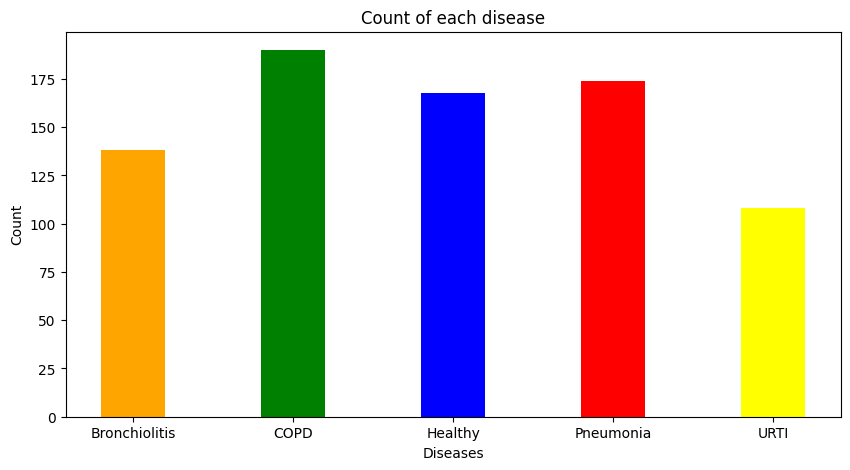

{'Bronchiolitis': 138, 'COPD': 190, 'Healthy': 168, 'Pneumonia': 174, 'URTI': 108}


In [194]:
augmented_lables_count(y_data_selected)

In [195]:
y_data_encode = y_data_selected.reshape(y_data_selected.shape[0],1)
y_data_encode = np.where(y_data_encode == 'COPD',np.array([1,0,0,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Bronchiolitis',np.array([0,1,0,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Pneumonia',np.array([0,0,1,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'URTI',np.array([0,0,0,1,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Healthy',np.array([0,0,0,0,1]).reshape(1,5) , y_data_encode)

Y_data = y_data_encode.astype('float64')

In [196]:
# Define the parent directory
parent_folder = r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases1"

# Initialize an empty list to store the paths
paths1 = []

# Traverse through the parent folder
for disease_name in os.listdir(parent_folder):
    # Construct the path to the train folder within each disease folder
    train_path = os.path.join(parent_folder, "validation", disease_name)
    # Check if the path exists and is a directory
    if os.path.isdir(train_path):
        # Append the path to the list
        paths1.append(train_path)

# Print the paths
print(paths1)


['C:\\Users\\abujo\\Downloads\\lung sound dataset\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\diseases1\\validation\\Bronchiolitis', 'C:\\Users\\abujo\\Downloads\\lung sound dataset\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\diseases1\\validation\\COPD', 'C:\\Users\\abujo\\Downloads\\lung sound dataset\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\diseases1\\validation\\Healthy', 'C:\\Users\\abujo\\Downloads\\lung sound dataset\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\diseases1\\validation\\Pneumonia', 'C:\\Users\\abujo\\Downloads\\lung sound dataset\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\diseases1\\validation\\URTI']


In [98]:
X_test=[]
y_test=[]
data = diagnosis_df
features = 64

##
path =[]
    ###
for x in paths1:
  x=x+"\\"
  for soundDir in (os.listdir(x)):
    if soundDir[-3:]=='wav'and soundDir[:3]!='103'and soundDir[:3]!='108'and soundDir[:3]!='115':
        p = list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0]
        if ((p == 'Bronchiectasis') or (p == 'Bronchiolitis')):
            data_x, sampling_rate = librosa.load(x+soundDir,sr=None,res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
            X_test.append(mfccs)
            y_test.append('Bronchiolitis')
            

        else:
            data_x, sampling_rate = librosa.load(x+soundDir,sr=None,res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
            X_test.append(mfccs)
            y_test.append(list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0])

           


In [197]:
mfccs_features = np.array(x_mfccs_selected)
lables = np.array(Y_data)

mfccs_features.shape , lables.shape

((778, 64), (778, 5))

In [102]:
mfcc_val = np.array(X_test)
y_val = np.array(y_test)

In [198]:
joblib.dump((mfcc_val, y_val), r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases1\validation\mfcc_val_data.joblib")

['C:\\Users\\abujo\\Downloads\\lung sound dataset\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\diseases1\\validation\\mfcc_val_data.joblib']

mfcc_val , y_val = load(r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases1\validation\mfcc_val_data.joblib")

In [199]:
mfcc_val , y_val = joblib.load(r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases1\validation\mfcc_val_data.joblib")

mfcc_val.shape

In [200]:
import numpy as np

# Assuming X_data and y_data are already defined
# Get indices of 'COPD' labels
copd_indices = np.where(y_val == 'COPD')[0]

# Randomly select 230 indices
selected_indices = np.random.choice(copd_indices, size=8, replace=False)

# Remove the rest of the indices
removed_indices = np.setdiff1d(copd_indices, selected_indices)

# Remove data corresponding to removed indices
x_mfccs_test= np.delete(mfcc_val, removed_indices, axis=0)
y_data_test = np.delete(y_val, removed_indices)

print("Shape of selected X_data:", x_mfccs_test.shape)
print("Shape of selected y_data:", y_data_test.shape)



Shape of selected X_data: (34, 64)
Shape of selected y_data: (34,)


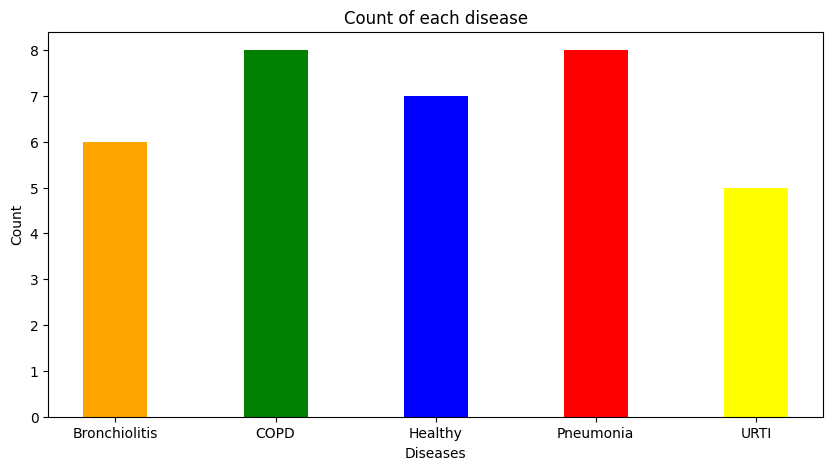

{'Bronchiolitis': 6, 'COPD': 8, 'Healthy': 7, 'Pneumonia': 8, 'URTI': 5}


In [201]:
augmented_lables_count(y_data_test)

In [202]:
y_data_encode1 = y_data_test.reshape(y_data_test.shape[0],1)
y_data_encode1 = np.where(y_data_encode1 == 'COPD',np.array([1,0,0,0,0]).reshape(1,5) , y_data_encode1)
y_data_encode1 = np.where(y_data_encode1 == 'Bronchiolitis',np.array([0,1,0,0,0]).reshape(1,5) , y_data_encode1)
y_data_encode1 = np.where(y_data_encode1 == 'Pneumonia',np.array([0,0,1,0,0]).reshape(1,5) , y_data_encode1)
y_data_encode1 = np.where(y_data_encode1 == 'URTI',np.array([0,0,0,1,0]).reshape(1,5) , y_data_encode1)
y_data_encode1 = np.where(y_data_encode1 == 'Healthy',np.array([0,0,0,0,1]).reshape(1,5) , y_data_encode1)
Y_test_data = y_data_encode1.astype('float64')

In [203]:
Y_test_data.shape

(34, 5)

In [204]:
x_train_gru = np.expand_dims(mfccs_features , axis=1)
x_val_gru = np.expand_dims(x_mfccs_test , axis=1)
y_train_gru = np.expand_dims(lables , axis=1)
y_val_gru = np.expand_dims(Y_test_data , axis=1)


In [205]:
y_train_gru.shape

(778, 1, 5)

In [226]:
Input_Sample = Input(shape=(1,64))

model_conv = Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(Input_Sample)
model_conv = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(model_conv)
model_conv = BatchNormalization()(model_conv)

model_conv = Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu')(model_conv)
model_conv = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(model_conv)
model_conv = BatchNormalization()(model_conv)

model_2_1 = GRU(32,return_sequences=True,activation='tanh',go_backwards=True)(model_conv)
model_2 = GRU(128,return_sequences=True, activation='tanh',go_backwards=True)(model_2_1)

model_3 = GRU(64,return_sequences=True,activation='tanh',go_backwards=True)(model_conv)
model_3 = GRU(128,return_sequences=True, activation='tanh',go_backwards=True)(model_3)

model_x = GRU(64,return_sequences=True,activation='tanh',go_backwards=True)(model_conv)
model_x = GRU(128,return_sequences=True, activation='tanh',go_backwards=True)(model_x)

model_add_1 = add([model_3,model_2,model_x])

model_5 = GRU(128,return_sequences=True,activation='tanh',go_backwards=True)(model_add_1)
model_5 = GRU(32,return_sequences=True, activation='tanh',go_backwards=True)(model_5)

model_6 = GRU(64,return_sequences=True,activation='tanh',go_backwards=True)(model_add_1)
model_6 = GRU(32,return_sequences=True, activation='tanh',go_backwards=True)(model_6)

model_add_2 = add([model_5,model_6,model_2_1])


model_7 = Dense(32, activation=None)(model_add_2)
model_7 = LeakyReLU()(model_7)
model_7 = Dense(128, activation=None)(model_7)
model_7 = LeakyReLU()(model_7)

model_9 = Dense(64, activation=None)(model_add_2)
model_9 = LeakyReLU()(model_9)
model_9 = Dense(128, activation=None)(model_9)
model_9 = LeakyReLU()(model_9)

model_add_3 = add([model_7,model_9])

model_10 = Dense(64, activation=None)(model_add_3)
model_10 = LeakyReLU()(model_10)

model_10 = Dense(32, activation=None)(model_10)
model_10 = LeakyReLU()(model_10)

model_10 = Dense(5, activation="softmax")(model_10)

gru_model = Model(inputs=Input_Sample, outputs = model_10)

gru_model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 1, 64)]              0         []                            
                                                                                                  
 conv1d_18 (Conv1D)          (None, 1, 256)               82176     ['input_14[0][0]']            
                                                                                                  
 max_pooling1d_18 (MaxPooli  (None, 1, 256)               0         ['conv1d_18[0][0]']           
 ng1D)                                                                                            
                                                                                                  
 batch_normalization_22 (Ba  (None, 1, 256)               1024      ['max_pooling1d_18[0][0

In [34]:
!pip install tensorflow

In [139]:
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization, GRU, add, Dense, LeakyReLU
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create and compile the Keras model
def create_gru_model(learning_rate=0.001, patience=10, batch_size=32, epochs=10):
    Input_Sample = Input(shape=(1, 52))

    model_conv = Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(Input_Sample)
    model_conv = MaxPooling1D(pool_size=2, strides=2, padding='same')(model_conv)
    model_conv = BatchNormalization()(model_conv)

    model_conv = Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu')(model_conv)
    model_conv = MaxPooling1D(pool_size=2, strides=2, padding='same')(model_conv)
    model_conv = BatchNormalization()(model_conv)

    model_2_1 = GRU(32, return_sequences=True, activation='tanh', go_backwards=True)(model_conv)
    model_2 = GRU(128, return_sequences=True, activation='tanh', go_backwards=True)(model_2_1)

    model_3 = GRU(64, return_sequences=True, activation='tanh', go_backwards=True)(model_conv)
    model_3 = GRU(128, return_sequences=True, activation='tanh', go_backwards=True)(model_3)

    model_x = GRU(64, return_sequences=True, activation='tanh', go_backwards=True)(model_conv)
    model_x = GRU(128, return_sequences=True, activation='tanh', go_backwards=True)(model_x)

    model_add_1 = add([model_3, model_2, model_x])

    model_5 = GRU(128, return_sequences=True, activation='tanh', go_backwards=True)(model_add_1)
    model_5 = GRU(32, return_sequences=True, activation='tanh', go_backwards=True)(model_5)

    model_6 = GRU(64, return_sequences=True, activation='tanh', go_backwards=True)(model_add_1)
    model_6 = GRU(32, return_sequences=True, activation='tanh', go_backwards=True)(model_6)

    model_add_2 = add([model_5, model_6, model_2_1])

    model_7 = Dense(32, activation=None)(model_add_2)
    model_7 = LeakyReLU()(model_7)
    model_7 = Dropout(0.2)(model_7)
    model_7 = Dense(128, activation=None)(model_7)
    model_7 = LeakyReLU()(model_7)

    model_9 = Dense(64, activation=None)(model_add_2)
    model_9 = LeakyReLU()(model_9)
    model_9 = Dropout(0.2)(model_9)
    model_9 = Dense(128, activation=None)(model_9)
    model_9 = LeakyReLU()(model_9)

    model_add_3 = add([model_7, model_9])

    model_10 = Dense(64, activation=None)(model_add_3)
    model_10 = LeakyReLU()(model_10)

    model_10 = Dense(32, activation=None)(model_10)
    model_10 = LeakyReLU()(model_10)

    model_10 = Dense(5, activation="softmax")(model_10)

    gru_model = Model(inputs=Input_Sample, outputs=model_10)

    gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return gru_model

# Wrap the Keras model in a KerasClassifier
keras_model = KerasClassifier(build_fn=create_gru_model, verbose=0)

# Define the parameters to be tuned
param_grid = {
    'learning_rate': [0.1, 0.001, 0.0001],
    'patience': list(range(0, 300)),
    'batch_size': [8, 16, 32],
    'epochs': [10, 20, 30]
}

# Initialize GridSearchCV
clf = GridSearchCV(keras_model, param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object
clf.fit(x_train_gru, y_train_gru)
    
# Print the best parameters and best score
print(clf.best_params_)
print(clf.best_score_)


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [217]:
optimiser = tf.keras.optimizers.Adam(learning_rate = 0.0001)
gru_model.compile(optimizer=optimiser, loss='categorical_crossentropy',metrics=['accuracy'])

cb = [EarlyStopping(patience=300,monitor='accuracy',mode='max',restore_best_weights=True),
      ModelCheckpoint(r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\_GRU_CNN_3.h5",save_best_only=True)]

In [218]:
history = gru_model.fit(x_train_gru, y_train_gru, batch_size=8, epochs=60, validation_data=(x_val_gru, y_val_gru), callbacks = cb)

Epoch 1/60
98/98 [==============================] - 21s 41ms/step - loss: 1.5577 - accuracy: 0.3072 - val_loss: 1.4609 - val_accuracy: 0.4412
Epoch 2/60
98/98 [==============================] - 1s 9ms/step - loss: 1.4170 - accuracy: 0.4833 - val_loss: 1.2842 - val_accuracy: 0.5000
Epoch 3/60
98/98 [==============================] - 1s 10ms/step - loss: 1.2540 - accuracy: 0.5591 - val_loss: 1.1078 - val_accuracy: 0.6176
Epoch 4/60
98/98 [==============================] - 1s 9ms/step - loss: 1.1018 - accuracy: 0.5835 - val_loss: 0.9836 - val_accuracy: 0.6471
Epoch 5/60
98/98 [==============================] - 1s 9ms/step - loss: 0.9913 - accuracy: 0.6041 - val_loss: 0.9491 - val_accuracy: 0.7059
Epoch 6/60
98/98 [==============================] - 1s 10ms/step - loss: 0.9396 - accuracy: 0.6311 - val_loss: 0.9286 - val_accuracy: 0.6471
Epoch 7/60
98/98 [==============================] - 1s 10ms/step - loss: 0.8744 - accuracy: 0.6465 - val_loss: 0.9037 - val_accuracy: 0.7059
Epoch 8/60
98/9

In [219]:
Model_Results = gru_model.evaluate(x_train_gru, y_train_gru)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])


25/25 [==============================] - 0s 4ms/step - loss: 0.3496 - accuracy: 0.8535
LOSS:  0.3496
ACCURACY:  0.8535


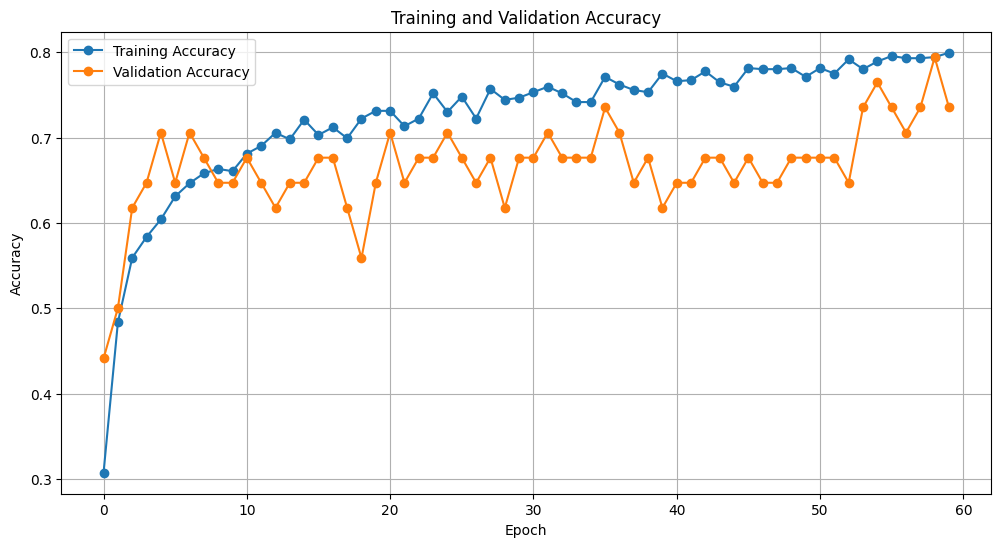

In [220]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

2/2 [==============================] - 3s 18ms/step


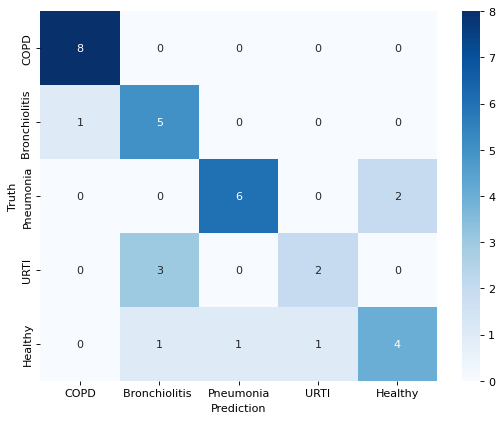

In [221]:
classes = ["COPD" ,"Bronchiolitis ", "Pneumonia", "URTI", "Healthy"]
preds = gru_model.predict(x_val_gru)
classpreds = [np.argmax(t) for t in preds ]
y_testclass = [np.argmax(t) for t in y_val_gru]
cm = confusion_matrix(y_testclass, classpreds)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [222]:
print(classification_report(y_testclass, classpreds, target_names=classes))

                precision    recall  f1-score   support

          COPD       0.89      1.00      0.94         8
Bronchiolitis        0.56      0.83      0.67         6
     Pneumonia       0.86      0.75      0.80         8
          URTI       0.67      0.40      0.50         5
       Healthy       0.67      0.57      0.62         7

      accuracy                           0.74        34
     macro avg       0.73      0.71      0.70        34
  weighted avg       0.74      0.74      0.73        34



In [223]:
def gru_diagnosis_prediction(test_audio):
    data_x, sampling_rate = librosa.load(test_audio)
    data_x = stretch (data_x,1.2)

    features = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=64).T,axis = 0)

    features = features.reshape(1,64)

    test_pred = gru_model.predict(np.expand_dims(features, axis = 1))
    classpreds = classes[np.argmax(test_pred[0], axis=1)[0]]
    confidence = test_pred.T[test_pred[0].mean(axis=0).argmax()].mean()

    print (classpreds , confidence)

In [225]:
file1 = r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases1\validation\Healthy\225_1b1_Pl_sc_Meditron.wav"
gru_diagnosis_prediction(file1)
file2 = r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases1\validation\Healthy\121_1p1_Tc_sc_Meditron.wav"
gru_diagnosis_prediction(file2)
file3 = r'C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files\163_2b2_Ar_mc_AKGC417L.wav'
gru_diagnosis_prediction(file3)
file4 = r'C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files\135_2b3_Pr_mc_LittC2SE.wav'
gru_diagnosis_prediction(file4)
file5 = r"C:\Users\abujo\Downloads\lung sound dataset\Respiratory_Sound_Database\Respiratory_Sound_Database\diseases1\train\URTI\188_1b1_Pl_sc_Meditron.wav"
gru_diagnosis_prediction(file5)

1/1 [==============================] - 0s 16ms/step
Healthy 0.98785186
1/1 [==============================] - 0s 31ms/step
COPD 0.9968213
1/1 [==============================] - 0s 33ms/step
COPD 0.9999043
1/1 [==============================] - 0s 31ms/step
Pneumonia 0.5704591
1/1 [==============================] - 0s 16ms/step
Pneumonia 0.694855
